<a href="https://colab.research.google.com/github/isha141/Twitter-Sentiment-Analysis-/blob/main/Naive_Bayes_Classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk


In [ ]:
pip install seaborn  ## library for visualization

In [ ]:
import re ##regular expression
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# pd.set_option("display.max_colwidth",200) ##to display the particular option 
# warnings.filterwarnings("ignore",category=DeprecationWarning)
# %matplotlib inline  ##to display in this tab only 

In [ ]:
train=pd.read_csv("/content/isha (13).csv")
train.head(5)

,full_text,retweet_count,user_followers_count,favorite_count,place,coordinates,geo,created_at,id_str
0,COVID-19 Updates: 24 घंटे में 83 हजार 876 नए म...,0,9,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299076685824
1,RT @doctor_oxford: Thread/ This is Li Wenliang...,0,2607,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299206770689
2,Kronologi Penularan COVID-19 di SMPN 3 Sawit h...,0,141,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299009687554
3,RT @LovedTooEasily: Eigenlijk had Hugo de Jong...,0,134,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299366199296
4,RT @FlukeiS: เด็กโดนน้ำร้อนลวกตรงอกกับท้อง ไม...,0,68,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299395432451


In [ ]:
train.shape  ##shows numbers of rows and columns

(274, 9)

In [ ]:
train['retweet_count'].value_counts() ##shows the retweet count  with no retwwet it has 299 tweets and with 3 we have retweet_count

0    274
Name: retweet_count, dtype: int64

In [ ]:
train['favorite_count'].value_counts() ##counts only those value which are having 0 and 1 

0    274
Name: favorite_count, dtype: int64

In [ ]:
##to remove links and username from the tweet 
def remove_pattern(text,pattern):
  r=re.findall(pattern,text)
  for i in r:
    text=re.sub(i,'',text)
  return text

Remove username,puncttuatins,links and emojis from the tweets 

In [ ]:
train['full_text']=np.vectorize(remove_pattern)(train['full_text'],"@[\w]*") ##calll function to remove links and @username
train.head()
##np.vectorize is an step of feature extraction

,full_text,retweet_count,user_followers_count,favorite_count,place,coordinates,geo,created_at,id_str
0,COVID-19 Updates: 24 घंटे में 83 हजार 876 नए म...,0,9,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299076685824
1,"RT : Thread/ This is Li Wenliang, the extraord...",0,2607,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299206770689
2,Kronologi Penularan COVID-19 di SMPN 3 Sawit h...,0,141,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299009687554
3,RT : Eigenlijk had Hugo de Jonge het nog wel i...,0,134,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299366199296
4,RT : เด็กโดนน้ำร้อนลวกตรงอกกับท้อง ไม่มารพ แต...,0,68,0,NaN,NaN,NaN,Mon Feb 07 09:11:57 +0000 2022,1490614299395432451


In [ ]:
train=train.drop(['place','coordinates','geo','id_str'],axis=1)
train.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at
0,COVID-19 Updates: 24 घंटे में 83 हजार 876 नए म...,0,9,0,Mon Feb 07 09:11:57 +0000 2022
1,"RT : Thread/ This is Li Wenliang, the extraord...",0,2607,0,Mon Feb 07 09:11:57 +0000 2022
2,Kronologi Penularan COVID-19 di SMPN 3 Sawit h...,0,141,0,Mon Feb 07 09:11:57 +0000 2022
3,RT : Eigenlijk had Hugo de Jonge het nog wel i...,0,134,0,Mon Feb 07 09:11:57 +0000 2022
4,RT : เด็กโดนน้ำร้อนลวกตรงอกกับท้อง ไม่มารพ แต...,0,68,0,Mon Feb 07 09:11:57 +0000 2022


In [ ]:
##program to remove emojis nad punctuation marks
train['full_text']=train['full_text'].str.replace("[^a-zA-Z#]"," ",regex=True)
train.head() 
##/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: 
##FutureWarning: The default value of regex will change from True to False in a future version.
##in this case  it returns waring if we don't use regular expression explicitly 

,full_text,retweet_count,user_followers_count,favorite_count,created_at
0,COVID Updates ...,0,9,0,Mon Feb 07 09:11:57 +0000 2022
1,RT Thread This is Li Wenliang the extraord...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022
2,Kronologi Penularan COVID di SMPN Sawit h...,0,141,0,Mon Feb 07 09:11:57 +0000 2022
3,RT Eigenlijk had Hugo de Jonge het nog wel i...,0,134,0,Mon Feb 07 09:11:57 +0000 2022
4,RT ...,0,68,0,Mon Feb 07 09:11:57 +0000 2022


Apply Sentiment Anlysis ,We have to remove Stopping words 

In [ ]:
train['full_text']=train['full_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) >3]))
train.head()
##remove stooping words i.e a,the an is ,are ,if

,full_text,retweet_count,user_followers_count,favorite_count,created_at
0,COVID Updates https jUHzB IrSX https afmKnoJr,0,9,0,Mon Feb 07 09:11:57 +0000 2022
1,Thread This Wenliang extraordinarily brave whi...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022
2,Kronologi Penularan COVID SMPN Sawit https,0,141,0,Mon Feb 07 09:11:57 +0000 2022
3,Eigenlijk Hugo Jonge iets makkelijker Ernst Ku...,0,134,0,Mon Feb 07 09:11:57 +0000 2022
4,COVID,0,68,0,Mon Feb 07 09:11:57 +0000 2022


In [ ]:
##Apply tokenization split all the words with white space and store in list/tuple
tokenized_tweet=train['full_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [COVID, Updates, https, jUHzB, IrSX, https, af...
1    [Thread, This, Wenliang, extraordinarily, brav...
2    [Kronologi, Penularan, COVID, SMPN, Sawit, https]
3    [Eigenlijk, Hugo, Jonge, iets, makkelijker, Er...
4                                              [COVID]
Name: full_text, dtype: object

In [ ]:
from nltk.stem.porter import*
stemmer=PorterStemmer()
tokenized_tweet= tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x ]) 
print(tokenized_tweet.head())

0    [covid, updat, http, juhzb, irsx, http, afmknojr]
1    [thread, thi, wenliang, extraordinarili, brave...
2      [kronolog, penularan, covid, smpn, sawit, http]
3    [eigenlijk, hugo, jong, iet, makkelijk, ernst,...
4                                              [covid]
Name: full_text, dtype: object


In [ ]:
##Apply sentiment Anlaysis  
##function to get subjectivity 
from textblob import TextBlob
# def sentiment_analysis(text):
def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity
## create function to get polarity 
def getPoloarity(text):
     return TextBlob(text).sentiment.polarity


train['Subject'] = train['full_text'].apply(getSubjectivity)
train['Polarity'] = train['full_text'].apply(getPoloarity)
def getAnalysis(score):
   if(score<0):
     return 'Negative'
   elif(score>0) :
     return 'Positive'
   else:
     return 'Neutral'



In [ ]:
train.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,Subject,Polarity
0,COVID Updates https jUHzB IrSX https afmKnoJr,0,9,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00
1,Thread This Wenliang extraordinarily brave whi...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022,0.416667,0.35
2,Kronologi Penularan COVID SMPN Sawit https,0,141,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00
3,Eigenlijk Hugo Jonge iets makkelijker Ernst Ku...,0,134,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00
4,COVID,0,68,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00


In [ ]:
##Apply score to the tweets 
train['Score']=train['Polarity'].apply(getAnalysis)
train.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,Subject,Polarity,Score
0,COVID Updates https jUHzB IrSX https afmKnoJr,0,9,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
1,Thread This Wenliang extraordinarily brave whi...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022,0.416667,0.35,Positive
2,Kronologi Penularan COVID SMPN Sawit https,0,141,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
3,Eigenlijk Hugo Jonge iets makkelijker Ernst Ku...,0,134,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
4,COVID,0,68,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral


In [ ]:
negative_tweet=[]
negative_tweet=train[train.Score=='Negative']
print(negative_tweet.full_text.head())

5     Betul time duduk rumah teres dulu senang bagi ...
28               ideas keep getting worse https mAtlaJX
35       Fucking media devastated lockdowns There fixed
38    Djokovic worst enemy maybe great tennis star d...
50         #Taubira Covid politique vague https ZwDMJsQ
Name: full_text, dtype: object


In [ ]:
import pandas as pd 
neg_word=[] 
for i in negative_tweet.full_text:
    neg_word.append(i) 
neg_word=pd.Series(neg_word).str.cat(sep=' ') ###is is used to concatenate string to the passed caller string sep is a seperator
print(neg_word)

Betul time duduk rumah teres dulu senang bagi anak lepas duduk flat rasa susah Tapi kena bawah https XoOSek ideas keep getting worse https mAtlaJX Fucking media devastated lockdowns There fixed Djokovic worst enemy maybe great tennis star does know behave this https axcNDfQK #Taubira Covid politique vague https ZwDMJsQ fuck does stupid dumb bitch hope ever wrote this article this tweet covid Indonesia bans entry foreign tourists Jakarta airport over spike Covid cases https SZqKdGje this result increased transmission Covid known lead psychosis other severe psychiatric symptoms Covid might still here think people care anymore seeing everyone without mask common Tell about this proper treatment case COVID breakthrough Pfizer tested negative three times last week CRONACA Capezzone infastidito sono preso Covid nonostante dosi Green Pass quindi inutile Reda feel like this idea that wearing mask horribly disruptive annoying largely held people aren neurod biggest surprises past were firstly a

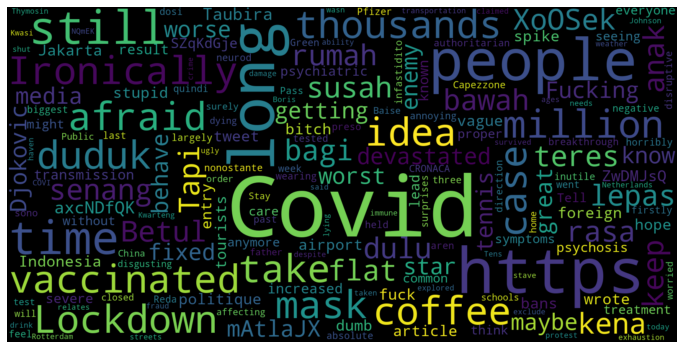

In [ ]:
##using wordcloud we are able to represent an image of a most repeting word 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(neg_word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")  ##not dispaly any axis
plt.show()

In [ ]:
positive_tweet=[]
positive_tweet=train[train.Score=='Positive']
print(positive_tweet.full_text.head())

1     Thread This Wenliang extraordinarily brave whi...
6     Never forget landed lead role feature late rig...
8     years today Wenliang dies COVID more than mont...
23    Natsuki Hanae resumed work Monday after testin...
25    think that believable just covid these situati...
Name: full_text, dtype: object


In [ ]:
positive_word=[]
for i in positive_tweet.full_text:
    positive_word.append(i)
positive_word=pd.Series(positive_word).str.cat(sep=' ') ##used to seperate wors from the string 
print(positive_word)

Thread This Wenliang extraordinarily brave whistle blowing Chinese doctor died Covid exactly year Never forget landed lead role feature late right before were suppose start filming covid pulled LMAO years today Wenliang dies COVID more than month after accused spreading rumors about virus Natsuki Hanae resumed work Monday after testing positive COVID January https CzXLP think that believable just covid these situations house https QWCfqZUxiz COVID test available after tomorrow Hooper Avenue Dover Township https USiBb Need more staff been having delay issues since before Covid Actually listen player https afdAYeo Then called free COVID tests that paid billion made China Many Danes telling that COVID deaths with COVID https vSxXQoq Team mens skater Vincent Zhou tested positive COVID Michael Terry Zhou undergoing Perfect idee hoor laat kwetsbaren zichzelf beter beschermen LUKT NIET Zeker https zBDky Right above your tweet https LWzjsTRNCP COVID Cases Never Really Told Much This Brilliant 

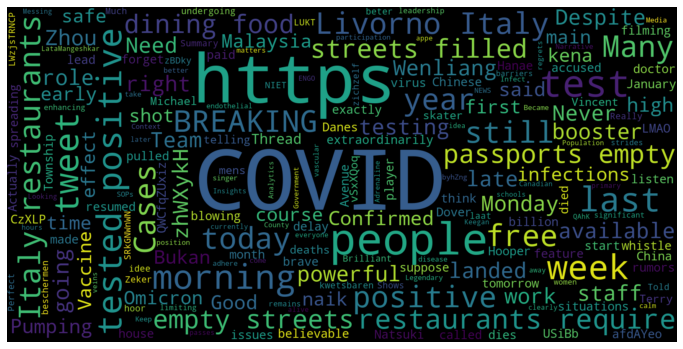

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(positive_word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

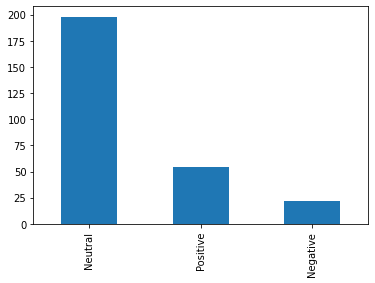

In [ ]:
##showing bar graph of Sentiment  
import matplotlib.pyplot as plt
train['Score'].value_counts().plot(kind="bar")
plt.show()


In [ ]:
##creating csv file
train.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,Subject,Polarity,Score
0,COVID Updates https jUHzB IrSX https afmKnoJr,0,9,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
1,Thread This Wenliang extraordinarily brave whi...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022,0.416667,0.35,Positive
2,Kronologi Penularan COVID SMPN Sawit https,0,141,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
3,Eigenlijk Hugo Jonge iets makkelijker Ernst Ku...,0,134,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
4,COVID,0,68,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral


In [ ]:
train.shape

(274, 8)

Apply Nayes baiys classifier Algorithm 


In [ ]:
x=train.iloc[:,0:7].values
# y=train.iloc[:,1].values
y=train['Score']

In [ ]:
x.shape

(274, 7)

In [ ]:
y.shape

(274,)

In [ ]:
x.ndim ##dimension of an array 

2

In [ ]:
y.ndim

1

In [ ]:
train.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,Subject,Polarity,Score
0,COVID Updates https jUHzB IrSX https afmKnoJr,0,9,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
1,Thread This Wenliang extraordinarily brave whi...,0,2607,0,Mon Feb 07 09:11:57 +0000 2022,0.416667,0.35,Positive
2,Kronologi Penularan COVID SMPN Sawit https,0,141,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
3,Eigenlijk Hugo Jonge iets makkelijker Ernst Ku...,0,134,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral
4,COVID,0,68,0,Mon Feb 07 09:11:57 +0000 2022,0.000000,0.00,Neutral


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
##bag of words
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=0.20,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(train['full_text'])
bow.shape

(274, 2)

In [ ]:
train=train.fillna(0)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,train['Score'],test_size=0.30,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(191, 2)
(83, 2)
(191,)
(83,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_naive= MultinomialNB().fit(x_train,y_train)
predicted_value=model_naive.predict(x_test)



In [ ]:
y_test.head()

220     Neutral
260     Neutral
204     Neutral
111     Neutral
179    Positive
Name: Score, dtype: object

In [ ]:
predicted_value[0:5]

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'], dtype='<U8')

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_value)
cm

array([[ 0,  7,  0],
       [ 0, 55,  0],
       [ 0, 21,  0]])

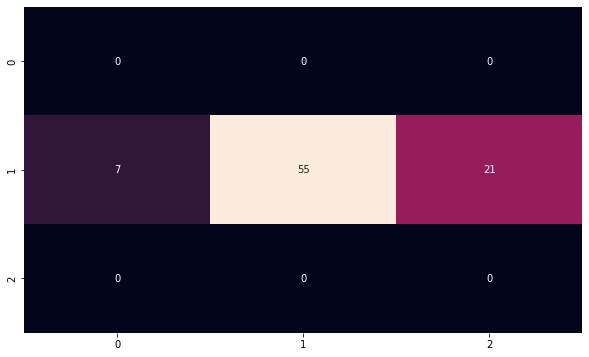

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
mat=confusion_matrix(y_test,predicted_value)

sns.heatmap(mat.T,annot=True,fmt='d',cbar=False)
# # plt.title('Confusion Matrix for Naive Bayes')
# plt.xlabel('true label')
# plt.ylabel('Predicted label') 
# plt.savefig('Confusion Matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score_naive=accuracy_score(predicted_value,y_test)
print("Accuracy With Naive bayes ",score_naive)

Accuracy With Naive bayes  0.6626506024096386
